Linear Regression is a supervised learning algorithm that models the relationship between a dependent variable and one or more independent variables by fitting a linear equation to observed data.   


In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df = pd.read_csv('height-weight.csv')

In [86]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

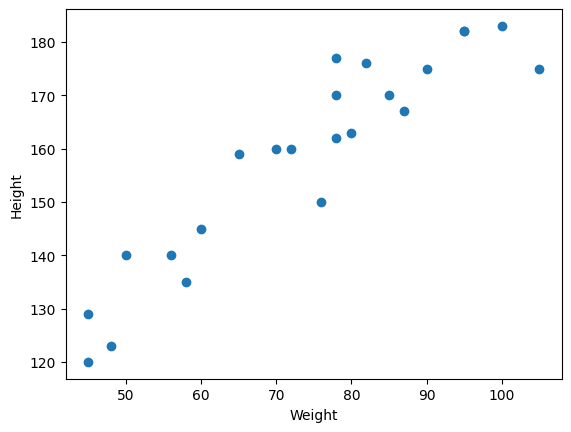

In [87]:
plt.scatter(df['Weight'], df['Height']) # scatter plot
plt.xlabel('Weight')
plt.ylabel('Height')

In [88]:
df.corr() # correlation matrix

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


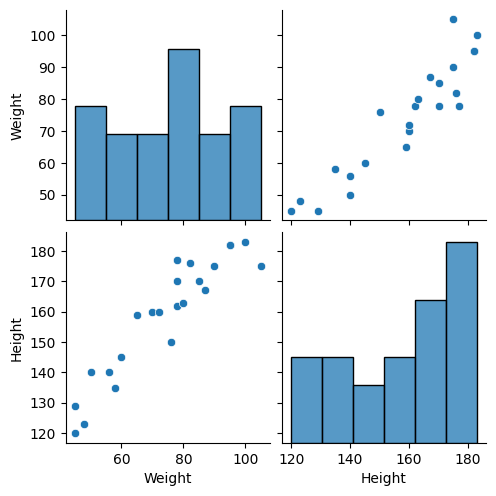

In [89]:
sns.pairplot(df) # pairplot

In [90]:
# Independent and dependent variables
X = df['Weight'] # independent variable
Y = df['Height'] # dependent variable

In [91]:
type(X) # pandas series
type(Y) # pandas series

pandas.core.series.Series

In [92]:
np.array(X).shape

(23,)

In [93]:
X = df[['Weight']] # independent variable should be a dataframe or 2D array
X.head()

,Weight
0,45
1,58
2,48
3,60
4,70


In [94]:
np.array(X).shape

(23, 1)

In [95]:
Y = df['Height'] # dependent variable should be a series or 1D array
Y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [96]:
np.array(Y).shape

(23,)

In the context of linear regression, the independent variable (often denoted as \( X \)) represents the input features used to predict the dependent variable (denoted as \( y \)). Here's why the independent variable should be a DataFrame or a 2D array:

1. **Multiple Features**: Linear regression can handle multiple input features. A 2D array or DataFrame allows you to represent multiple features (columns) for each observation (row).

2. **Matrix Operations**: Linear regression involves matrix operations, such as matrix multiplication. These operations require the input data to be in a 2D format to correctly apply the mathematical transformations.

3. **Consistency**: Using a 2D array or DataFrame ensures consistency in data handling, making it easier to apply preprocessing steps, transformations, and model fitting.

### Example

Here's a simple example using Python's `scikit-learn` library to illustrate this:


```import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Example data
# Independent variable (2D array or DataFrame)
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5]])
# Dependent variable (1D array)
y = np.array([2, 3, 4, 5])

# Using a 2D array
model = LinearRegression()
model.fit(X, y)

# Using a DataFrame
X_df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
model.fit(X_df, y)```




In this example, `X` is a 2D array with two features, and `y` is a 1D array representing the target variable. The `LinearRegression` model expects `X` to be in a 2D format to perform the fitting process correctly.

### Key Takeaways
- **Multiple Features**: A 2D array or DataFrame can represent multiple features.
- **Matrix Operations**: Required for mathematical operations in linear regression.
- **Consistency**: Ensures consistent data handling and preprocessing.

By adhering to this format, you ensure that your data is correctly structured for linear regression analysis.

In [97]:
# Train and test split
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# test_size=0.25 means 25% of the data will be used for testing
# random_state=0 is used to reproduce the same results
# random_state=42 is used to reproduce the same results

Random state is the seed used by the random number generator

Random state works by setting the seed of the random number generator before shuffling the data

In [98]:
X_train.shape

(17, 1)

#### Standardization
We use StandardScaler to standardize the data because the data is not normally distributed or standardized or they are on different scales

We apply Z-score normalization to standardize the data

Mean of the data becomes 0 and standard deviation becomes 1

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_train

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

Train: fit_transform is used to fit the scalar object to the training data and transform the training data

Test: transform is used to apply the scalar transformation to the data

If we use transform in Test data it will use the mean and standard deviation of the training data instead of the test data hence giving us a better result
 
Or if we use fit_transform in test data it will use the mean and standard deviation of the test data which is not good

This is to avoid data leakage, I don't want my Test data to have any info about Training Data


In [101]:
X_test = scalar.transform(X_test) 

In [102]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [103]:
# Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [104]:
regression = LinearRegression(n_jobs=-1) # n_jobs=-1 means use all the CPU cores

[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [105]:
regression.fit(X_train, Y_train) # Expects 2D array for X

LinearRegression(n_jobs=-1)

In [106]:
regression

LinearRegression(n_jobs=-1)

In [108]:
print(f"Coefficient or slope: {regression.coef_}") # slope
print(f"Intercept: {regression.intercept_}") # intercept

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


y = mx + c

regression.coef_ is m

regression.intercept_ is c - y intercept

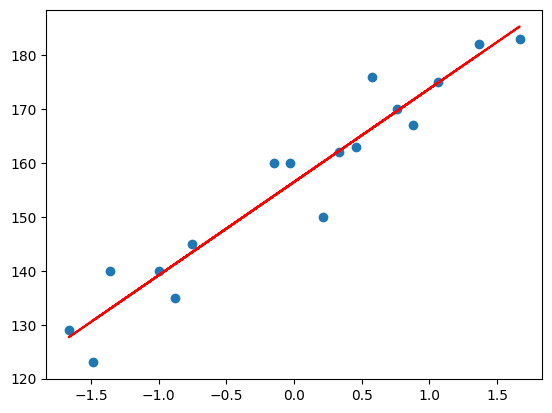

In [110]:
# Plot best fit line
plt.scatter(X_train, Y_train)
plt.plot(X_train, regression.predict(X_train), color='red')

In [111]:
import plotly.graph_objects as go

# Create scatter plot for training data
scatter = go.Scatter(x=X_train.flatten(), y=Y_train, mode='markers', name='Training Data')

# Create line plot for the regression line
line = go.Scatter(x=X_train.flatten(), y=regression.predict(X_train), mode='lines', name='Best Fit Line', line=dict(color='red'))

# Create the figure and add the scatter and line plots
fig = go.Figure(data=[scatter, line])

# Update layout for better visualization
fig.update_layout(title='Best Fit Line using Plotly',
                xaxis_title='Weight',
                yaxis_title='Height')

# Show the plot
fig.show()

Prediction of test data

Predicted height output = intercpt + coef_(weight)

y_pred_test = 156.470 + 17.29 * X_test

In [112]:
# Prediction for test data
y_pred = regression.predict(X_test)

In [113]:
# Performance Metrics - Mean Squared Error, R2 Score, Mean Absolute Error, Mean Squared Log Error, Root Mean Squared Error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error, root_mean_squared_error

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
msle = mean_squared_log_error(Y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
print(f"Mean Squared Log Error: {msle}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 114.84069295228699
Mean Absolute Error: 9.66512588679501
R2 Score: 0.7360826717981276
Mean Squared Log Error: 0.004194361855536419
Root Mean Squared Error: 10.716374991212605




### Explanation
- **Mean Squared Error (MSE)**: Measures the average of the squares of the errors.
- **Mean Absolute Error (MAE)**: Measures the average of the absolute errors.
- **R2 Score**: Indicates the proportion of the variance in the dependent variable that is predictable from the independent variables.
- **Mean Squared Log Error (MSLE)**: Measures the average of the squares of the logarithmic errors.
- **Root Mean Squared Error (RMSE)**: The square root of the mean squared error, providing an error metric in the same units as the target variable.

In [117]:
# Adjusted R2 Score
def adjusted_r2(r2, n, p):
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1))

n = len(X_test) # number of samples
p = X_test.shape[1] # number of features

adj_r2 = adjusted_r2(r2, n, p)
print(f"Adjusted R2 Score: {adj_r2}")

Adjusted R2 Score: 0.6701033397476595


In [119]:
# OLS Linear Regression
import statsmodels.api as sm

In [120]:
model = sm.OLS(Y_train, X_train).fit()

In [121]:
predictions = model.predict(X_test)
print(predictions)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [122]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 07 Oct 2024   Prob (F-statistic):                       0.664
Time:                        13:23:51   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning:

`kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.



In [124]:
# Prediction for new data

regression.predict([[72]]) # 72 kg
# Not done standard scaling for new data

array([1401.94139895])

In [125]:
regression.predict(scalar.transform([[72]])) # 72 kg

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



array([155.97744705])